In [1]:
import numpy as np
np.random.seed(3301)
import pandas as pd
pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 50)
import matplotlib.pyplot as plt

#Modelo
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

#k fold validation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold 

#Métricas
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix

In [2]:
#CARGA DE DATOS YA PREPROCESADOS
# Uso de la libreria pandas para la lectura de archivos
data=pd.read_csv('data-HQ.csv', sep=',', encoding = 'utf-8')
# Asignación a una nueva variable de los datos leidos
data_t=data.dropna()
display(data_t.sample(10))

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,text,class,words
85445,85445,85445,85445,271813,I wish I just died in that car accident.I had ...,suicide,"['i', ' wish', ' i', ' just', ' died', ' ..."
187027,187027,187027,187027,175193,My crush has a crush on me. Right before schoo...,non-suicide,"['my', ' crush', ' has', ' a', ' crush', '..."
178581,178581,178581,178581,161892,Opinion: Parents can be douchebags sometimes. ...,non-suicide,"['opin', ' ', ' parents', ' can', ' be', '..."
29609,29609,29609,29609,250423,Hi anybody want to talk I am at a sleep over r...,non-suicide,"['hi', ' anybody', ' want', ' to', ' talk'..."
12816,12816,12816,12816,336514,Getting very close to hanging myselfI'm sick o...,suicide,"['get', ' very', ' close', ' to', ' hangin..."
14348,14348,14348,14348,71230,I do not think I Have ever needed a hug so bad...,non-suicide,"['i', ' do', ' not', ' think', ' i', ' ha..."
171931,171931,171931,171931,134189,Welp...I left my note and made my plan. Wish m...,suicide,"['welp', ' ', ' i', ' left', ' my', ' not..."
105765,105765,105765,105765,163744,Petition to be able to change your reddit user...,non-suicide,"['petit', ' to', ' be', ' able', ' to', ' ..."
194842,194842,194842,194842,176741,"It never endsI have chronic pain, I Have been ...",suicide,"['it', ' never', ' endsi', ' have', ' chro..."
94512,94512,94512,94512,289543,01110100 01101001 01110100 01101100 01100101 ...,non-suicide,"['01110100', ' 01101001', ' 01110100', ' 01..."


In [3]:
#Separar datos
X_data, y_data = data_t['words'],data_t['class']
y_data = (y_data == 'suicide').astype(int)
y_data

0         1
1         0
2         1
3         1
4         1
         ..
195695    0
195696    0
195697    0
195698    0
195699    1
Name: class, Length: 195672, dtype: int32

In [4]:
#Se realiza la vectorización por conteo de palabras
count = CountVectorizer()
X_count = count.fit_transform(X_data)
print(X_count.shape)

(195672, 177393)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data, y_data, test_size=0.33, random_state=17)

C:\Users\marti\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


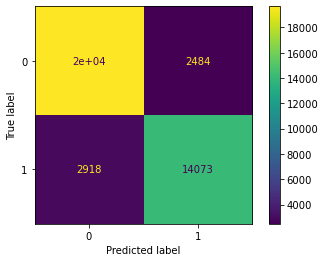

In [5]:
gaussNB = GaussianNB()
gaussNB.fit(X_train, Y_train)

y_pred = gaussNB.predict(X_test)
confusion_matrix(Y_test, y_pred)

In [6]:
print('Exactitud: %.2f' % accuracy_score(Y_test, y_pred))
print("Recall: {}".format(recall_score(Y_test,y_pred)))
print("Precisión: {}".format(precision_score(Y_test,y_pred)))
print("Puntuación F1: {}".format(f1_score(Y_test,y_pred)))

Exactitud: 0.86
Recall: 0.8282620210699783
Precisión: 0.8499728211632542
Puntuación F1: 0.8389769881960176


In [8]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88     22144
           1       0.85      0.83      0.84     16991

    accuracy                           0.86     39135
   macro avg       0.86      0.86      0.86     39135
weighted avg       0.86      0.86      0.86     39135

